## Clustering

Clustering is the process of organizing objects into groups whose members are similar in some manner.

It deals with finding a structure in a collection of unlabeled data.

### K-means Clustering

It need to state the number of clusters for this type of clustering.

It uses a distance function to calculate the distance between clusters. Distance function is a domain expertise

eg. the distance function between two resumes is the level of experience and educational qualification. 

The distance between two books is the story, characters in the story etc.

K-means picks k number of points for each cluster known as centroids. Each data point forms a cluster with the closest centroids, i.e. k clusters.On addition of every point the centroid changes. We repeat the process till centroid don't change. 

We try with different initialization pint and find the optima and consider the best among these local optima.

In [1]:
# importing necessary libraries and loading data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris= load_iris()
X=iris.data
y=iris.target
print('Dimension of data set is:',X.shape)

Dimension of data set is: (150, 4)


In [2]:
import os
from sklearn.cluster import KMeans
import warnings
# Suppress the warning
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn.cluster._kmeans')

# Setting the environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

list1 = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Setting n_init explicitly
    kmeans.fit(X)
#WCSS ( Within Clusters sum of squares)
    list1.append(kmeans.inertia_)

It is always suggested to determine the optimum number of clusters before actually applying alogrighm for k-means. The next section uses a 'for'loop to determine the optimum number of clusters. An empthy list is created named list1. A for loop is created from 1 to 11 and k-means algorithm is executed considering the values of k from 1 to 10. The command Kmeans(n_clusters=i, random_state=42) applies the k-means algorithm and the value of inertia is stored in the list corresponding to each value of k.

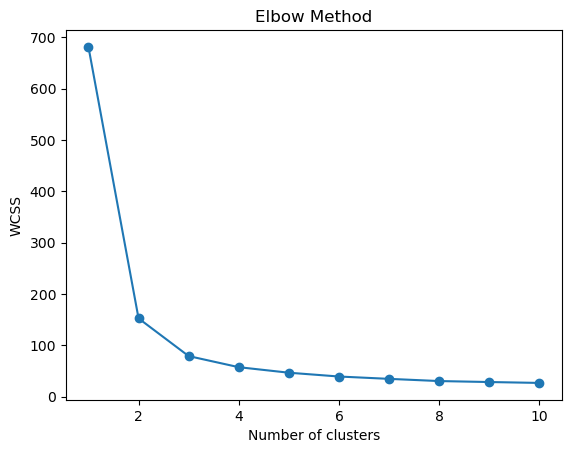

In [3]:
# Creating the scree plot
plt.plot(range(1,11),list1,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

A scree plot is created for different values of k and corresponding value of inertial generated by applying k-means algorithm. From the scree plot, we can observe that the optimum number of clusters is 3

In [4]:
#Fitting K-means algorithm to data set with optimum number of clusters
kmeans=KMeans(n_clusters=3,random_state=10)
y_kmeans=kmeans.fit_predict(X)
print("The predicted clusters are:\n",y_kmeans)
print("The centers are:\n",kmeans.cluster_centers_)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The predicted clusters are:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
The centers are:
 [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


The next section then applies k means algorithm for three clusters and the command 'kmeans.fit_predict(X)' then predicts the cluster for each of the 150 observations and stores in the variable named y_kmeans. The centers are also determined for each of the clusters corresponding to each of the four variables of the iris dataset and displayed using cluster_centers. 

In [5]:
# Determining number of observations in the clusters
data = {'Original':y,'Predicted':y_kmeans}
kmeansdf = pd.DataFrame(data,columns=['Original','Predicted'])
print("Details of the predicted cluster are:\n",kmeansdf["Predicted"].value_counts())

Details of the predicted cluster are:
 1    62
0    50
2    38
Name: Predicted, dtype: int64


The next section then creates a dataframe with two columns named original and predicted containing the values of original values of dependent variable and predicted value of cluster 

In [6]:
# Creating names of the clusters
kmeansdf['Original'].replace(to_replace=int("0"),value="Setosa",inplace=True)
kmeansdf['Original'].replace(to_replace=int("1"),value="Versicolor",inplace=True)
kmeansdf['Original'].replace(to_replace=int("2"),value="Virginaca",inplace=True)
kmeansdf['Predicted'].replace(to_replace=int("0"),value="Setosa",inplace=True)
kmeansdf['Predicted'].replace(to_replace=int("1"),value="Versicolor",inplace=True)
kmeansdf['Predicted'].replace(to_replace=int("2"),value="Virginaca",inplace=True)

Since the dependent variable contains the values 0, 1 and 2. It is needed to give a name to the clusters. The next seciton gives the name to the clusters of the original dependent variable and predicted values. This is required since the values in the dataframe are numerical and we should really classify them according to the specie they belong to. We know that the depndent variable has three species of the flower: satosa, versicolor and virginaca.

In [7]:
# Creating confusion matrix of the model
from sklearn.metrics import confusion_matrix
results=confusion_matrix(kmeansdf['Original'],kmeansdf['Predicted'])
print("The confusion matrix is:\n",results)

The confusion matrix is:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [8]:
# Detrimining accuracy of the model
from sklearn.metrics import accuracy_score
score=accuracy_score(kmeansdf['Original'],kmeansdf['Predicted'])
print("The accuracy is:",score.round(3))

The accuracy is: 0.893


next section determines the accuracy of the predicted cluster through the confusion matrix and accuracy score. The details of the clusters show that the number of observations belonging to each cluster is as follows: 62, 52 and 38. The results of the confusion matrix shows that all 50 observations that belonged to first cluster are grouped similarly in the predicted cluster also. Another cluster contained 62 observations of which 48 were correctly classified and 14 were wrongly classified. Similarly the third cluster had 38 observations of which 36 were correctly classified. The accuracy score is 89.4% because 16 observations from 150 were incorrectly classified

<Figure size 1500x2000 with 0 Axes>

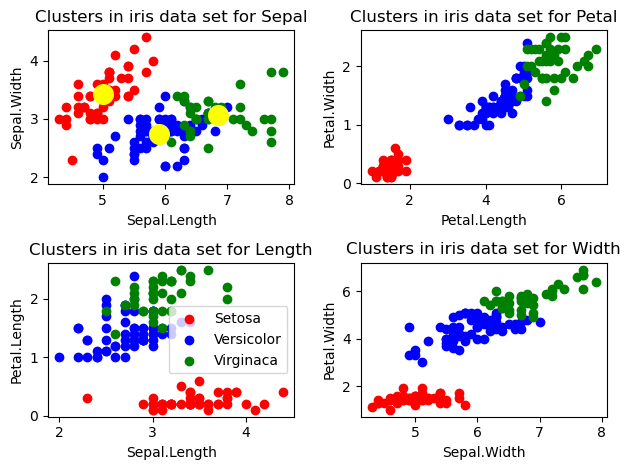

In [9]:
# creating a chart depicting clusters considering differnt variables
plt.figure(figsize=(15,20))

# Visualizing the clusters for sepal.length and sepal.width
plt.figure(2)
plt.subplot(221)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],c='red')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],c='blue')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],c='green')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Centroids')
plt.title('Clusters in iris data set for Sepal')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')

# Visualizing the clusters for petal.length and petal.width
plt.subplot(222)
plt.scatter(X[y_kmeans==0,2],X[y_kmeans==0,3],c='red')
plt.scatter(X[y_kmeans==1,2],X[y_kmeans==1,3],c='blue')
plt.scatter(X[y_kmeans==2,2],X[y_kmeans==2,3],c='green')
plt.title('Clusters in iris data set for Petal')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

# Visualizing the clusters for sepal.length and petal.Length
plt.subplot(223)
plt.scatter(X[y_kmeans==0,1],X[y_kmeans==0,3],c='red',label='Setosa')
plt.scatter(X[y_kmeans==1,1],X[y_kmeans==1,3],c='blue',label='Versicolor')
plt.scatter(X[y_kmeans==2,1],X[y_kmeans==2,3],c='green',label='Virginaca')
plt.title('Clusters in iris data set for Length')
plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')
plt.legend()

# Visualizing the clusters for sepal.length and petal.Length
plt.subplot(224)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,2],c='red',label='Setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,2],c='blue',label='Versicolor')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,2],c='green',label='Virginaca')
plt.title('Clusters in iris data set for Width')
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Width')

# Adjust the spacing between the subplots
plt.tight_layout()
plt.show();

We can see from chart that the observations are actually forming good clusters. This further means that the accuracy is rightly predicted

### Agglomerative Hierarchical Clustering
there are two approaches in AH clustering. Bottom-up and top-down. In top down approach, the entire dataset is considered as a single cluster and is divided into two clusters, each of these two clusters is further divided into two. In the case of small observataions, bottoms up approach yields better results, in this case every observation in the data set is considered as one cluster and then the observations are combined together.

In [10]:
# Importing necessary Libraries
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [11]:
# Reading data set.
x,y=make_blobs()
print("Dimensions of independent variables is:",x.shape)

Dimensions of independent variables is: (100, 2)


In [12]:
#performing Clustering
agg = AgglomerativeClustering(n_clusters=3)
ypred=agg.fit_predict(x)

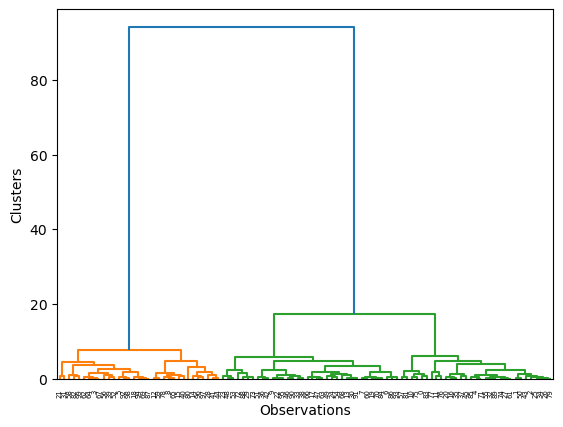

In [13]:
# Creating a dendogram
from scipy.cluster.hierarchy import dendrogram,ward
result=ward(x)
dendrogram(result)
plt.xlabel("Observations")
plt.ylabel("Clusters")
plt.show()

In [14]:
# storing values in the form of data frame
mydata = {'Original':y,'Predicted':ypred}
clusterdf = pd.DataFrame(mydata,columns=['Original','Predicted'])

In [15]:
# Creating names of the clusters
clusterdf['Original'].replace(to_replace=int("0"),value="Class 0",inplace=True)
clusterdf['Original'].replace(to_replace=int("1"),value="Class 1",inplace=True)
clusterdf['Original'].replace(to_replace=int("2"),value="Class 2",inplace=True)
clusterdf['Predicted'].replace(to_replace=int("0"),value="Class 2",inplace=True)
clusterdf['Predicted'].replace(to_replace=int("1"),value="Class 1",inplace=True)
clusterdf['Predicted'].replace(to_replace=int("2"),value="Class 0",inplace=True)

In [16]:
# Creating confusion matrix of the model
from sklearn.metrics import confusion_matrix
results=confusion_matrix(clusterdf['Original'],clusterdf['Predicted'])
print("The confusion matrix is:\n",results)

The confusion matrix is:
 [[32  2  0]
 [ 4 29  0]
 [ 0  0 33]]


In [17]:
# Detrimining accuracy of the model
from sklearn.metrics import accuracy_score
score=accuracy_score(clusterdf['Original'],clusterdf['Predicted'])
print("The accuracy is:",score)

The accuracy is: 0.94
